# Fitness Analysis:
## Heart Rate Goals by AHA Guidelines

This analysis evaluates heart rate data from the strava.csv dataset to study Professor Brooks's heart rate tendencies during workouts and compare to American Heart Association guidelines.

### First import the data set and explore time and heart rate data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns
import math
from mpl_toolkits.mplot3d import Axes3D


import warnings
warnings. filterwarnings('ignore') 

%matplotlib inline
mpl.rcParams['figure.figsize'] = [16.0,8.0]

df_original=pd.read_csv('strava.csv')

### Reduce to a smaller dataframe to analyze heart rate
To start, I will only need heart rate data and time stamps from the original dataframe.

In [2]:
df=df_original.loc[:,['heart_rate', 'timestamp']].dropna()
df['time_stamp']=pd.to_datetime(df['timestamp'])
df.drop('timestamp', axis=1, inplace=True)
df.head(5)

,heart_rate,time_stamp
0,68.0,2019-07-08 21:04:03
1,68.0,2019-07-08 21:04:04
2,71.0,2019-07-08 21:04:07
3,77.0,2019-07-08 21:04:14
4,80.0,2019-07-08 21:04:15


### Find day of week and date for each row
I want to see if there are weekly trends and also organize the data by date, so I'll create new columns for both day of week and date.

In [3]:
df['day_of_week'] = df['time_stamp'].dt.day_name()
df['date']=df['time_stamp'].dt.date
df.head()

,heart_rate,time_stamp,day_of_week,date
0,68.0,2019-07-08 21:04:03,Monday,2019-07-08
1,68.0,2019-07-08 21:04:04,Monday,2019-07-08
2,71.0,2019-07-08 21:04:07,Monday,2019-07-08
3,77.0,2019-07-08 21:04:14,Monday,2019-07-08
4,80.0,2019-07-08 21:04:15,Monday,2019-07-08


### Calculate and plot distribution of day of week for workout days that have heart rate data
I'll first look at the overall count of workout days with heart rate data by day of the week to see if there are any trends. To do this I'll create a new dataframe of all the dates of workouts where heart rate data was logged, then categorize them by day of the week.

In [4]:
workout_dates=pd.DataFrame({'Dates': df['time_stamp'].dt.date.unique()})
workout_dates['Dates']=pd.to_datetime(workout_dates['Dates'])
workout_dates['Days']=workout_dates['Dates'].dt.day_name()


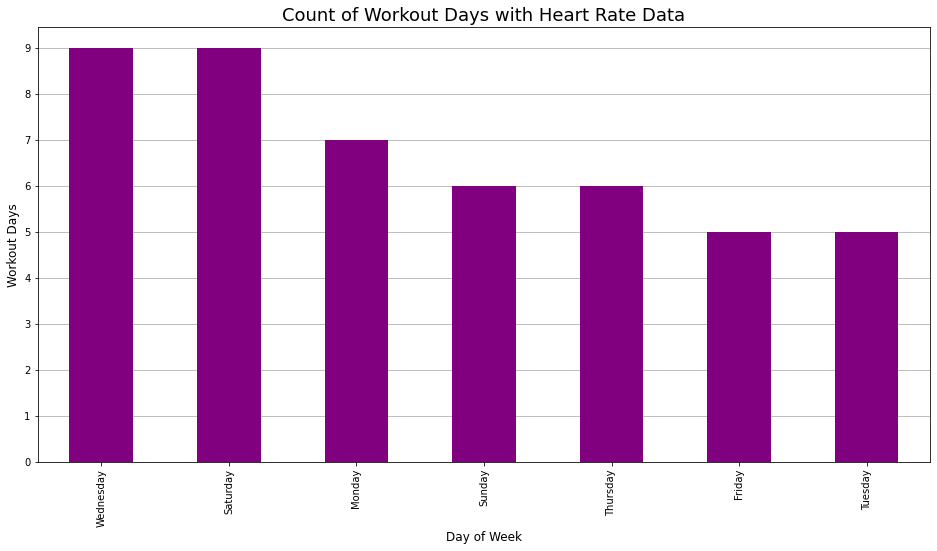

In [5]:
workout_dates['Days'].value_counts().plot(kind='bar', color='purple', zorder=2)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Workout Days', fontsize=12)
plt.yticks(ticks=range(10))
plt.grid(axis='y', zorder=1)
plt.title('Count of Workout Days with Heart Rate Data', fontsize=18)
plt.show()

The most common workout days with heart rate data are Wednesday and Saturday with 9 days each. Friday and Tuesday are less common workout days.

## Heart Rate

Next I'll look at the heart rate data. The American Heart Association categorizes workout intensity based on a percent of the recommended maximum heart rate based on age.

A quick look at Professor Brooks's LinkedIn profile leads to an assumption of an approximate age of 40 years. For this age the AHA recommends a max heart rate of 180 bpm. Moderate and vigorous aerobic activity by heart rate are defined as percentages of this max, as follows:

Moderate exercise intensity: 50% to 70% of maximum heart rate: 90bpm to 126bpm.

Vigorous exercise intensity: 70% to 85% of maximum heart rate: 126bpm to 153bpm.

Below are the unique values of heart rate in the data set ranging from 56bpm to 183bpm.

In [6]:
print(df['heart_rate'].unique())
print(f"Min value: {df['heart_rate'].min()}, Max value: {df['heart_rate'].max()}")

[ 68.  71.  77.  80.  83.  86.  90.  92.  94.  91.  88.  87.  84.  82.
  79.  81.  97.  98. 101. 102. 103. 104. 105. 106. 107. 110. 111. 113.
 112. 114. 115. 116. 117. 118. 119. 109. 108. 120. 121. 122. 123. 124.
 125. 127. 126. 128. 129. 130. 131. 132. 134. 133. 136. 137. 135.  75.
  78.  85. 138. 139. 140. 141. 142. 143.  73.  76.  89.  93.  95.  99.
 100.  96.  72.  74. 144. 145. 146. 147. 148. 149. 150. 151. 153. 154.
 155.  63.  60.  64.  67. 152.  65.  62.  61.  57.  58.  66.  70.  56.
  69. 156. 159. 160. 161. 162. 163. 164. 158. 157. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183.]
Min value: 56.0, Max value: 183.0


I can see that Professor Brooks has pushed beyond 'vigorous exercise' and even a bit past the recommended maximum heart rate of 180. Going forward, I will classify heart rate as follows:

90-126bpm: Moderate Intensity<br>126-153bpm: Vigorous Intensity<br>153bpm+: Danger Zone

Next I'll look at the distribution of heart rate data overlaid with a normal curve.

The average heart rate is 134.68009385999218


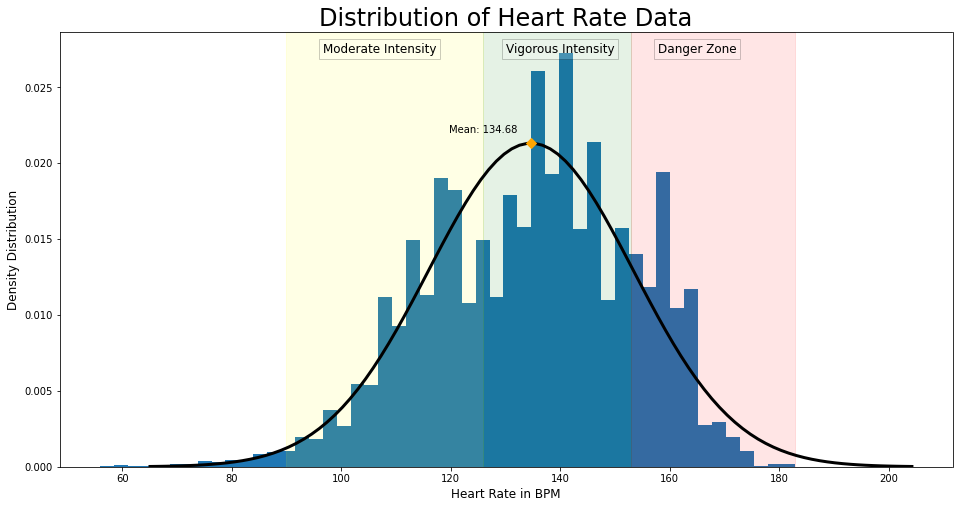

In [7]:
plt.hist(df['heart_rate'], density=True, bins=50, zorder=1)

hr_mean=np.mean(df['heart_rate'])
hr_std=np.std(df['heart_rate'])
print(f'The average heart rate is {hr_mean}')


rv = stats.norm(hr_mean, hr_std)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x)
plt.plot(x, y, zorder=3, linewidth=3, color='black')
plt.axvspan(90, 126, alpha=0.1, color='yellow', zorder=2)
plt.axvspan(126, 153, alpha=0.1, color='green', zorder=2)
plt.axvspan(153, df['heart_rate'].max(), alpha=0.1, color='red', zorder=2)

plt.xlabel('Heart Rate in BPM', fontsize=12)
plt.ylabel('Density Distribution', fontsize=12)
plt.title('Distribution of Heart Rate Data', fontsize=24)

bbox_props = dict(boxstyle="square,pad=0.3", fc='white', alpha=0.2)
plt.text(107, 0.0275, "Moderate Intensity", ha="center", va="center", 
            size=12,
            bbox=bbox_props)
plt.text(140, 0.0275, "Vigorous Intensity", ha="center", va="center", 
            size=12,
            bbox=bbox_props)
plt.text(165, 0.0275, "Danger Zone", ha="center", va="center", 
            size=12,
            bbox=bbox_props)
plt.scatter(hr_mean, np.max(y), marker='D', color='orange', zorder=5, s=50)
plt.text(hr_mean-15, 0.022, f'Mean: {np.round(hr_mean, 2)}')

plt.show()

The data doesn't quite fit a normal distribution because it is left-skewed. Professor Brooks is spending the majority of his time in the moderate and vigorous intensity ranges. But there are a considerable number of data points in the 'danger zone', which is concerning. Looking at the data with a log scale on the y axis may give a closer view of these points.

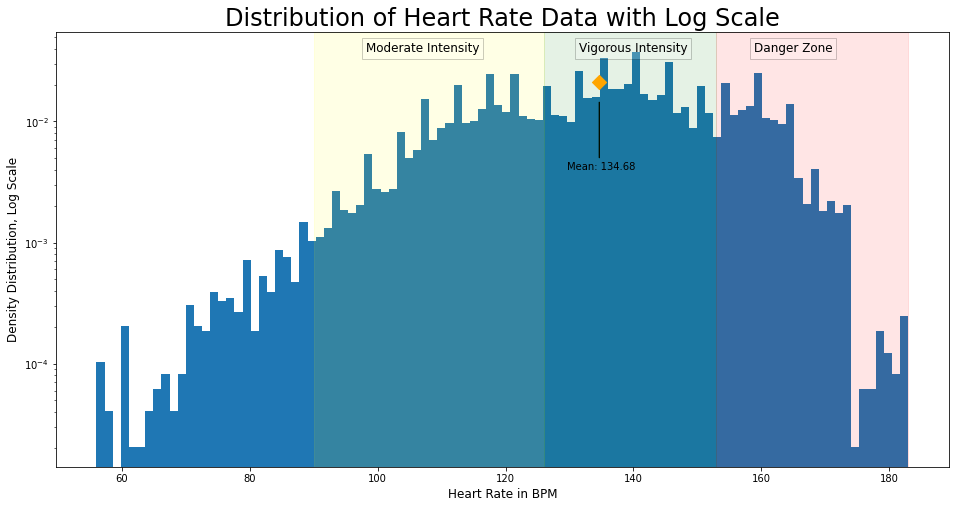

In [8]:
plt.hist(df['heart_rate'], density= True, bins=100)
plt.yscale('log')

plt.axvspan(90, 126, alpha=0.1, color='yellow', zorder=2)
plt.axvspan(126, 153, alpha=0.1, color='green', zorder=2)
plt.axvspan(153, df['heart_rate'].max(), alpha=0.1, color='red', zorder=2)

plt.xlabel('Heart Rate in BPM', fontsize=12)
plt.ylabel('Density Distribution, Log Scale', fontsize=12)
plt.title('Distribution of Heart Rate Data with Log Scale', fontsize=24)

bbox_props = dict(boxstyle="square,pad=0.3", fc='white', alpha=0.2)
plt.text(107, 0.04, "Moderate Intensity", ha="center", va="center", 
            size=12,
            bbox=bbox_props)
plt.text(140, 0.04, "Vigorous Intensity", ha="center", va="center", 
            size=12,
            bbox=bbox_props)
plt.text(165, 0.04, "Danger Zone", ha="center", va="center", 
            size=12,
            bbox=bbox_props)
plt.scatter(hr_mean, np.max(y), marker='D', color='orange', zorder=5, s=100)
plt.arrow(hr_mean, 0.005, 0, 0.005)
plt.text(hr_mean-5, 0.004, f'Mean: {np.round(hr_mean, 2)}')

plt.show()

These high heart rate readings are a significant portion of the data. Let's look further into those points. Perhaps there are days of the week that Professor Brooks is more likely to push himself too hard. I'll make a new dataframe of the maximum heart rate measurement for each day and plot these by day of the week.

In [9]:
maxes=df.groupby(['date']).agg({'heart_rate': 'max', 'day_of_week': 'max'}) 
max_by_day=maxes.reset_index()
max_by_day=max_by_day.loc[:, ['day_of_week', 'heart_rate']]
max_by_day.set_index('day_of_week', inplace=True)

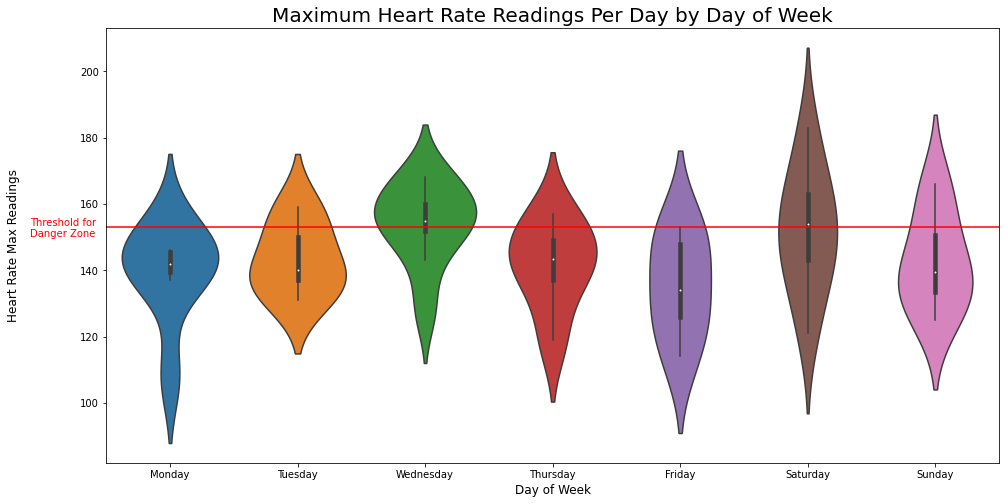

In [10]:
sns.violinplot(x="day_of_week", y="heart_rate", data=maxes, order=
               ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.axhline(y=153, color='red')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Heart Rate Max Readings', fontsize=12, labelpad=60)
plt.title('Maximum Heart Rate Readings Per Day by Day of Week', fontsize=20)
plt.text(-1.1, 150, 'Threshold for \nDanger Zone', color='red')
plt.show()

Wednesday and Saturday have more dates where Professor Brooks went into the danger zone than any other days of the week. Let's zoom in on one of those days to see if any insights can be gleaned by other factors of the workout.

First we'll find days where his heart rate goes into the danger zone.

In [11]:
df['exercise_level'] = (df['heart_rate']<=126) & (df['heart_rate']>=90)
df['exercise_level'].replace({True: 'Moderate'}, inplace=True)
df.loc[df['heart_rate'] < 90, 'exercise_level'] = 'Low' 
df.loc[(df['heart_rate'] > 126) & (df['heart_rate']<=153), 'exercise_level'] = 'High' 
df.loc[df['heart_rate'] > 153, 'exercise_level'] = 'Danger Zone' 


print(df['date'][df['exercise_level']=='Danger Zone'].unique())
print(len(df['date'][df['exercise_level']=='Danger Zone'].unique()))

[datetime.date(2019, 7, 17) datetime.date(2019, 8, 7)
 datetime.date(2019, 8, 10) datetime.date(2019, 8, 11)
 datetime.date(2019, 8, 14) datetime.date(2019, 8, 17)
 datetime.date(2019, 8, 18) datetime.date(2019, 8, 20)
 datetime.date(2019, 8, 21) datetime.date(2019, 8, 28)
 datetime.date(2019, 8, 31) datetime.date(2019, 9, 14)
 datetime.date(2019, 9, 23) datetime.date(2019, 9, 25)
 datetime.date(2019, 9, 28) datetime.date(2019, 10, 3)]
16


There are 16 days where his heart rate reaches the danger zone. I will start by exploring the first of these dates: July 17, 2019. First I'll plot heart rate over time, zoomed in on the workout portion of the day. I'll do this by finding the min and max time stamps on July 17.

In [12]:
print('Start of workout:', df[df['date']==pd.to_datetime('2019-07-17')].apply({'time_stamp': 'min'}))
print('End of workout:', df[df['date']==pd.to_datetime('2019-07-17')].apply({'time_stamp': 'max'}))
start=df[df['date']==pd.to_datetime('2019-07-17')].apply({'time_stamp': 'min'})
end=df[df['date']==pd.to_datetime('2019-07-17')].apply({'time_stamp': 'max'})

Start of workout: time_stamp   2019-07-17 23:17:06
dtype: datetime64[ns]
End of workout: time_stamp   2019-07-17 23:52:56
dtype: datetime64[ns]


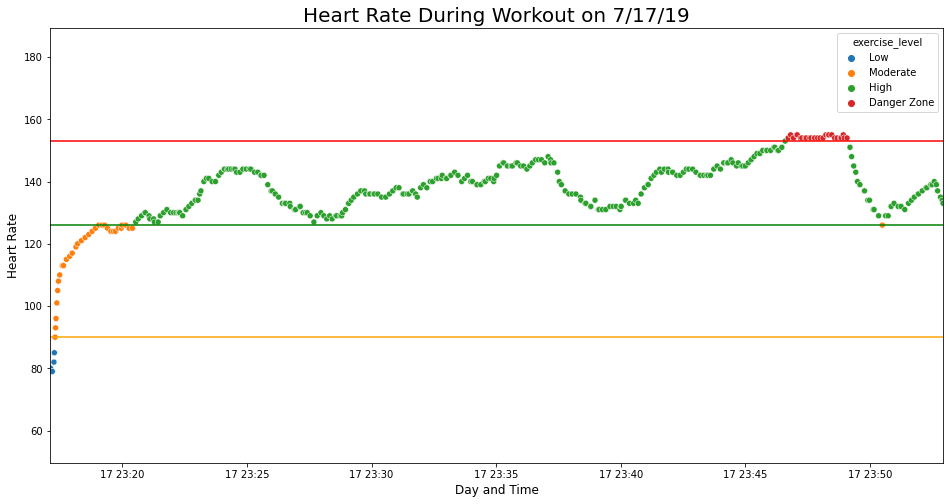

In [13]:
sns.scatterplot(x='time_stamp', y='heart_rate', hue='exercise_level', data=df)
plt.xlim(left=start, right=end)
plt.axhline(90, color='orange')
plt.axhline(126, color='green')
plt.axhline(153, color='red')

plt.xlabel('Day and Time', fontsize=12)
plt.ylabel('Heart Rate', fontsize=12)
plt.title('Heart Rate During Workout on 7/17/19', fontsize=20)
plt.show()

It looks like the danger zone heart rates were logged late in the workout. I want to see if additional factors could be influencing the increase, so I'll bring in some additional data from the original file and use 3D plots to check out some other variables. First, I'll use a 3D plot to view the workout route by latitude, longitude, and altitude. 

In [14]:
df_geo=df_original[['heart_rate', 'position_lat','position_long', 'timestamp', 'altitude', 'speed', 'Power']]
df_geo['timestamp']=pd.to_datetime(df_geo['timestamp'])
df_geo['date']=df_geo['timestamp'].dt.date
df_geo=df_geo[df_geo['date']==pd.to_datetime('2019-07-17')]
df_geo.head()

,heart_rate,position_lat,position_long,timestamp,altitude,speed,Power,date
2945,80.0,504290304.0,-999093713.0,2019-07-17 23:17:06,3857.0,0.0,NaN,2019-07-17
2946,80.0,504290279.0,-999094007.0,2019-07-17 23:17:07,3858.0,252.0,NaN,2019-07-17
2947,79.0,504289902.0,-999095023.0,2019-07-17 23:17:10,3859.0,2025.0,NaN,2019-07-17
2948,79.0,504289886.0,-999095478.0,2019-07-17 23:17:11,3858.0,2734.0,NaN,2019-07-17
2949,82.0,504289263.0,-999097107.0,2019-07-17 23:17:15,3853.0,2575.0,NaN,2019-07-17


In [15]:
import math

df_geo["position_lat"] = df_geo["position_lat"] * ( 180 / 2**31 )
df_geo["position_long"] = df_geo["position_long"] * ( 180 / 2**31 )

def lat2y(a):
  return 180.0/math.pi*math.log(math.tan(math.pi/4.0+a*(math.pi/180.0)/2.0))

df_geo["position_lat_degrees_mercantor"]=df_geo["position_lat"].apply(lat2y)

df_geo.head()

,heart_rate,position_lat,position_long,timestamp,altitude,speed,Power,date,position_lat_degrees_mercantor
2945,80.0,42.269125,-83.743068,2019-07-17 23:17:06,3857.0,0.0,NaN,2019-07-17,46.724780
2946,80.0,42.269123,-83.743092,2019-07-17 23:17:07,3858.0,252.0,NaN,2019-07-17,46.724777
2947,79.0,42.269091,-83.743177,2019-07-17 23:17:10,3859.0,2025.0,NaN,2019-07-17,46.724734
2948,79.0,42.269090,-83.743216,2019-07-17 23:17:11,3858.0,2734.0,NaN,2019-07-17,46.724733
2949,82.0,42.269038,-83.743352,2019-07-17 23:17:15,3853.0,2575.0,NaN,2019-07-17,46.724662


Text(0.5, 0, 'Altitude')

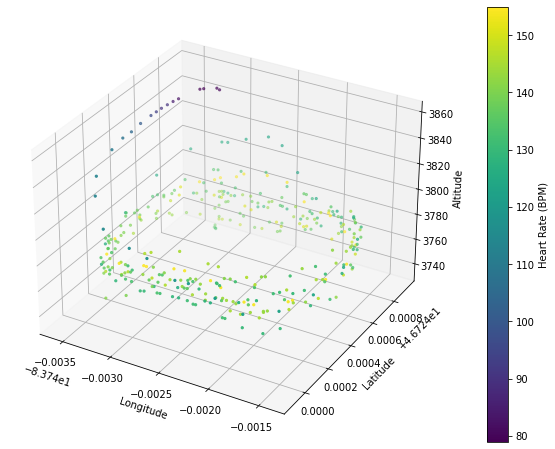

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')


artists=ax.scatter(df_geo["position_long"],df_geo["position_lat_degrees_mercantor"],df_geo["altitude"],
                   s=5, c=df_geo["heart_rate"], cmap='viridis')


plt.colorbar(artists).set_label("Heart Rate (BPM)")


ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Altitude')

Altitude does not appear to have an effect on heart rate, and the route is circular without a lot of altitude change anyway. Next I'll look at speed.

Text(0.5, 0, 'Speed')

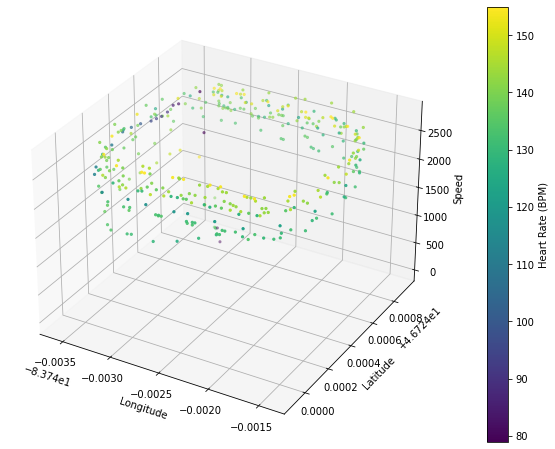

In [17]:
fig = plt.figure()
ax = fig.gca(projection='3d')


artists=ax.scatter(df_geo["position_long"],df_geo["position_lat_degrees_mercantor"],df_geo["speed"],
                   s=5, c=df_geo["heart_rate"], cmap='viridis')


plt.colorbar(artists).set_label("Heart Rate (BPM)")


ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Speed')

Speed does appear to have an effect on heart rate. These plots are only for one day, so I'll look at the overall effect of speed on heart rate for all of the observations in the original file that have heart rate data.

In [18]:
df_speedpow=df_original[['speed', 'Power','timestamp']]
df_speedpow['time_stamp']=pd.to_datetime(df_speedpow['timestamp'])
df_speedpow.drop('timestamp', axis=1, inplace=True)
df_full=df.merge(df_speedpow, on='time_stamp')

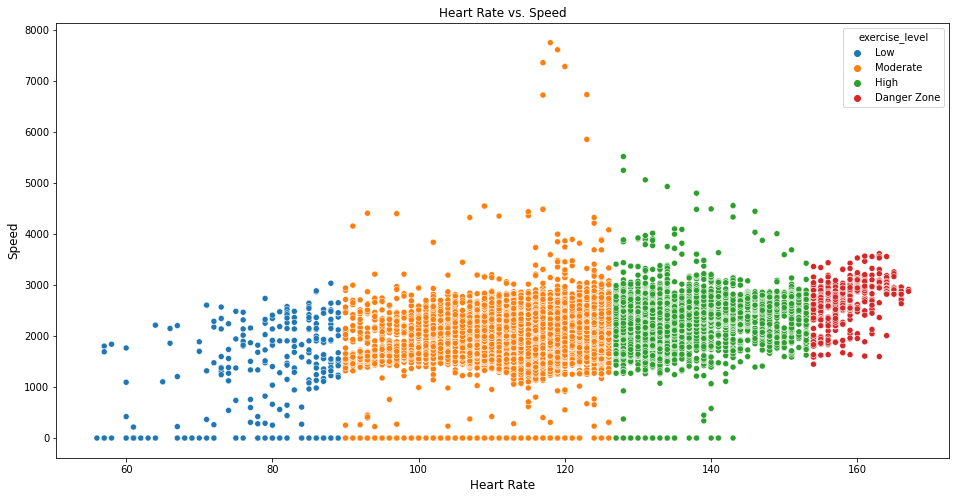

In [19]:
sns.scatterplot(x='heart_rate', y='speed', hue='exercise_level', data=df_full)
plt.xlabel('Heart Rate', fontsize=12)
plt.ylabel('Speed', fontsize=12)
plt.title('Heart Rate vs. Speed')
plt.show()

It does look like there is a linear relationship between heart rate and speed. As Professor Brooks approaches the danger zone, his speed is generally increasing. This relationship can be seen a little more clearly with the line of best fit overlaid, below:

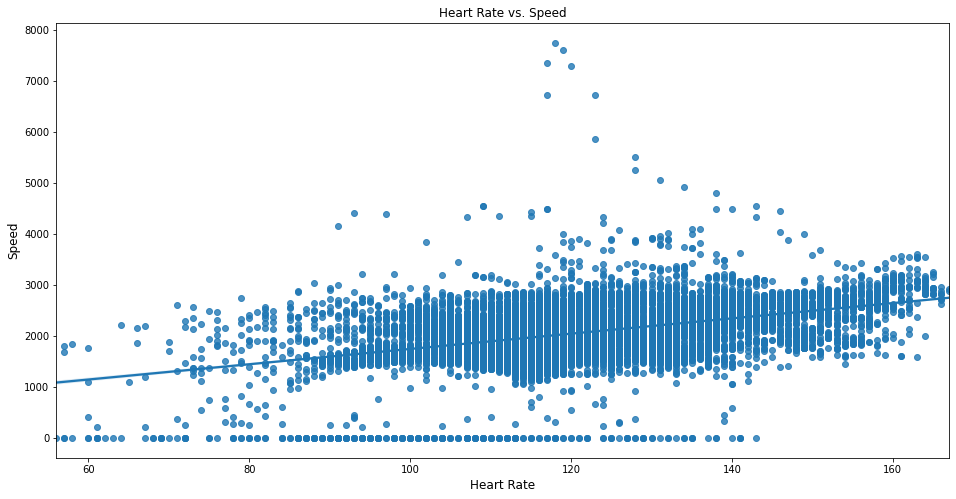

In [20]:
sns.regplot(x='heart_rate', y='speed', data=df_full)
plt.xlabel('Heart Rate', fontsize=12)
plt.ylabel('Speed', fontsize=12)
plt.title('Heart Rate vs. Speed')
plt.show()

Power was not measured on 7/17/19, but now looking at the full set of heart rate data I want to see if power has any overall correlation to heart rate. The plots are similar to those above for speed.

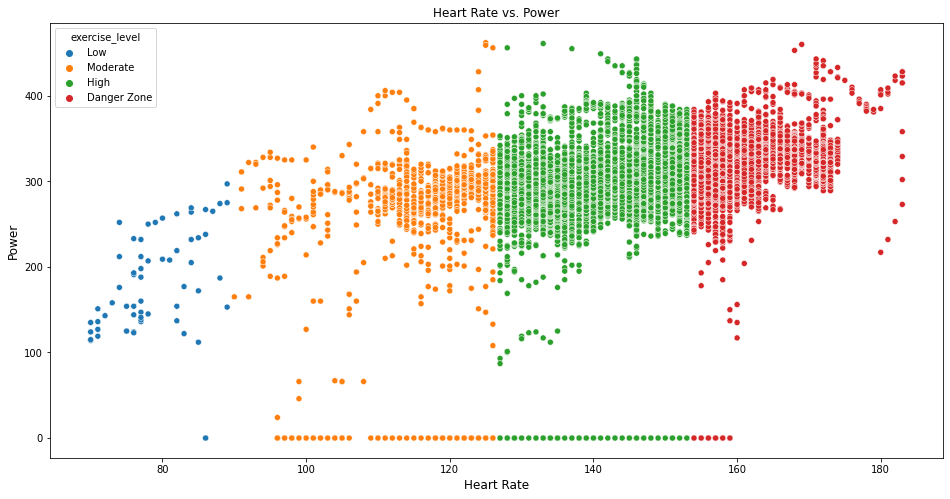

In [21]:
sns.scatterplot(x='heart_rate', y='Power', hue='exercise_level', data=df_full)
plt.xlabel('Heart Rate', fontsize=12)
plt.ylabel('Power', fontsize=12)
plt.title('Heart Rate vs. Power')
plt.show()

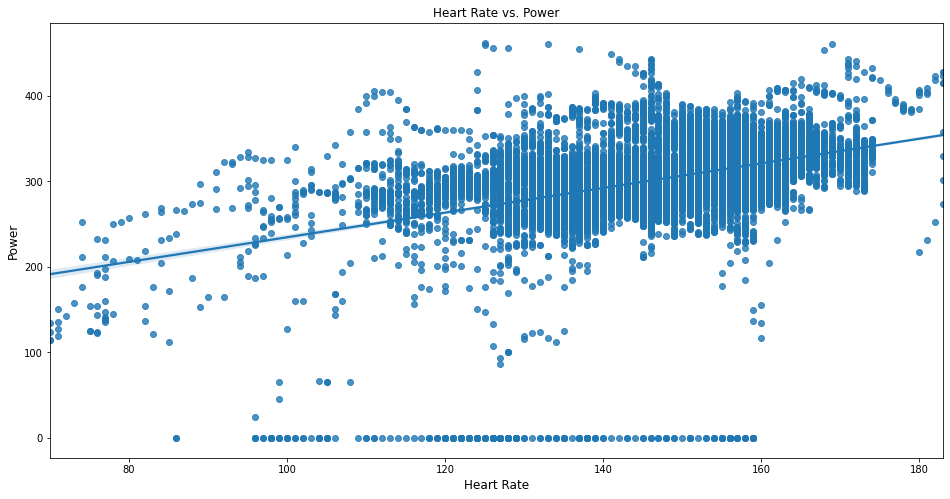

In [22]:
sns.regplot(x='heart_rate', y='Power', data=df_full)
plt.xlabel('Heart Rate', fontsize=12)
plt.ylabel('Power', fontsize=12)
plt.title('Heart Rate vs. Power')

plt.show()

It looks like both speed and power are correlated with heart rate. Professor Brooks may want to review the American Heart Association guidelines and adjust his power and speed to maintain a healthy heart rate during workouts. He should be particularly conscious of this on Wednesdays and Saturdays, when he is most likely to enter the 'danger zone'.

Resources for heart rate guidelines:<br>
https://www.heart.org/en/healthy-living/fitness/fitness-basics/aha-recs-for-physical-activity-in-adults<br>
https://www.mayoclinic.org/healthy-lifestyle/fitness/in-depth/exercise-intensity/art-20046887